# Exploración de los datos

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sate = pd.read_json("../data/raw/satellites.json")
debris = pd.read_json("../data/raw/debris.json")
rocket = pd.read_json("../data/raw/rockets.json")
unk = pd.read_json("../data/raw/unknown.json")
ucs = pd.read_excel("../data/raw/ucs-satellite-database.xlsx")

In [3]:
df = pd.concat([sate, debris, rocket, unk], ignore_index=True).sort_values(by='NORAD_CAT_ID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63521 entries, 55934 to 63520
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INTLDES        63521 non-null  object 
 1   NORAD_CAT_ID   63521 non-null  int64  
 2   OBJECT_TYPE    63521 non-null  object 
 3   SATNAME        63521 non-null  object 
 4   COUNTRY        63521 non-null  object 
 5   LAUNCH         63521 non-null  object 
 6   SITE           63521 non-null  object 
 7   DECAY          33442 non-null  object 
 8   PERIOD         62548 non-null  float64
 9   INCLINATION    62548 non-null  float64
 10  APOGEE         62548 non-null  float64
 11  PERIGEE        62548 non-null  float64
 12  COMMENT        946 non-null    object 
 13  COMMENTCODE    3553 non-null   float64
 14  RCSVALUE       63521 non-null  int64  
 15  RCS_SIZE       53148 non-null  object 
 16  FILE           63521 non-null  int64  
 17  LAUNCH_YEAR    63521 non-null  int64  
 18  LAUNCH_

In [5]:
df.sample(5)

,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
24745,1982-088Z,14649,DEBRIS,COSMOS 1405 DEB,CIS,1982-09-04,TTMTR,1984-01-04,91.06,64.97,...,0,None,1,1982,88,Z,Y,COSMOS 1405 DEB,1982-088Z,14649
34780,1986-017HS,22834,DEBRIS,MIR DEB,CIS,1986-02-19,TTMTR,1994-09-03,87.49,51.59,...,0,MEDIUM,7337,1986,17,HS,Y,MIR DEB,1986-017HS,22834
30610,2006-026PL,33180,DEBRIS,COSMOS 2421 DEB,CIS,2006-06-25,TTMTR,2008-10-10,88.67,65.04,...,0,SMALL,7337,2006,26,PL,Y,COSMOS 2421 DEB,2006-026PL,33180
33258,2000-057G,26551,DEBRIS,DNEPR 1 DEB,CIS,2000-09-26,TTMTR,2012-06-10,87.54,64.52,...,0,LARGE,7337,2000,57,G,Y,DNEPR 1 DEB,2000-057G,26551
26305,1993-026D,22786,DEBRIS,ALEXIS DEB,US,1993-04-25,AFWTR,None,NaN,NaN,...,0,None,1,1993,26,D,Y,ALEXIS DEB,1993-026D,22786


## Datos

In [ ]:
print("Cantidad de objetos:")
df["OBJECT_TYPE"].value_counts()

Cantidad de objetos:


OBJECT_TYPE
DEBRIS         35606
PAYLOAD        20328
ROCKET BODY     6699
UNKNOWN          888
Name: count, dtype: int64

In [ ]:
print("Paises propietarios:")
df["COUNTRY"].value_counts()

Paises propietarios:


COUNTRY
CIS     24966
US      23584
PRC      8469
FR       1457
JPN       863
        ...  
MNG         1
GHA         1
NICO        1
SVK         1
BWA         1
Name: count, Length: 120, dtype: int64

In [31]:
print("¿Cuantos objetos tiene Argentina?")
df[df["COUNTRY"]=="ARGN"]["OBJECT_TYPE"].value_counts()

¿Cuantos objetos tiene Argentina?


OBJECT_TYPE
PAYLOAD    67
DEBRIS      1
Name: count, dtype: int64

In [ ]:
print("Valores faltantes:")
df.isna().sum() # Ver DECAY

Valores faltantes:


INTLDES              0
NORAD_CAT_ID         0
OBJECT_TYPE          0
SATNAME              0
COUNTRY              0
LAUNCH               0
SITE                 0
DECAY            30079
PERIOD             973
INCLINATION        973
APOGEE             973
PERIGEE            973
COMMENT          62575
COMMENTCODE      59968
RCSVALUE             0
RCS_SIZE         10373
FILE                 0
LAUNCH_YEAR          0
LAUNCH_NUM           0
LAUNCH_PIECE         0
CURRENT              0
OBJECT_NAME          0
OBJECT_ID            0
OBJECT_NUMBER        0
dtype: int64

In [66]:
df["RCS_SIZE"].value_counts()

RCS_SIZE
SMALL     24933
LARGE     19345
MEDIUM     8870
Name: count, dtype: int64

## Gráficos

### Satelites lanzados por año

In [ ]:
df[df["OBJECT_TYPE"]=="PAYLOAD"]["LAUNCH_YEAR"].value_counts()
#df[(df["OBJECT_TYPE"] == "PAYLOAD") & (df["LAUNCH_YEAR"] == 1998)]

LAUNCH_YEAR
2023    2692
2024    2589
2022    2270
2021    1726
2020    1232
        ... 
1961      41
1960      21
1959      15
1958       8
1957       2
Name: count, Length: 69, dtype: int64

[]

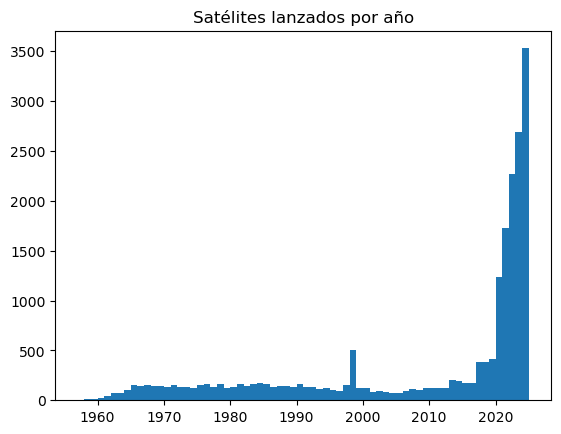

In [57]:
plt.hist(df[df["OBJECT_TYPE"]=="PAYLOAD"]["LAUNCH_YEAR"], bins=df["LAUNCH_YEAR"].unique())
plt.title("Satélites lanzados por año")
plt.plot()

### Tamaño de los objetos

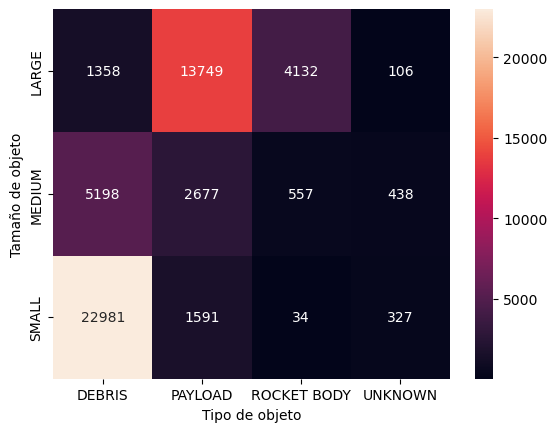

In [79]:
df_aux = df.pivot_table(index="RCS_SIZE", columns="OBJECT_TYPE", values="NORAD_CAT_ID", aggfunc="count")
sns.heatmap(df_aux, annot=True, fmt="d")
plt.xlabel("Tipo de objeto")
plt.ylabel("Tamaño de objeto")
plt.show()

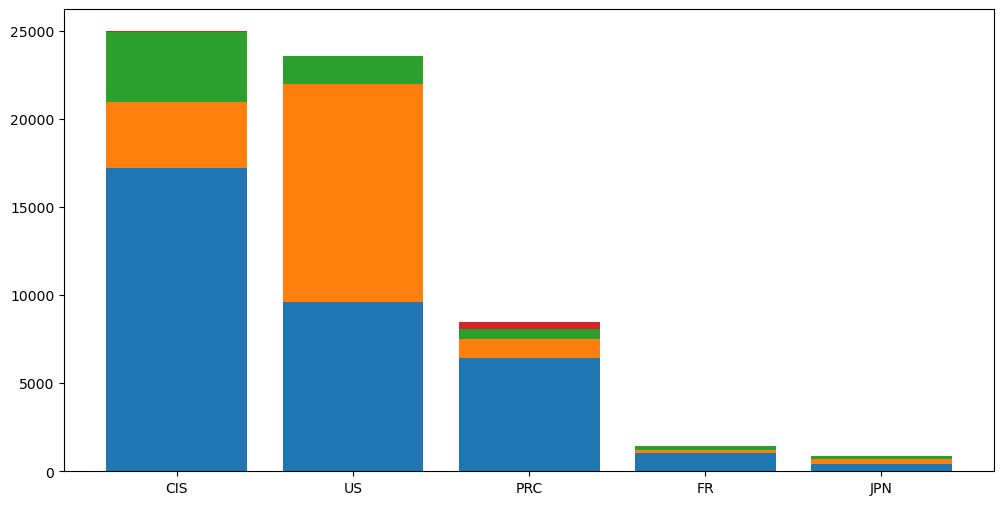

In [15]:
grouped = df.groupby(["COUNTRY", "OBJECT_TYPE"]).size().unstack(fill_value=0)

# Seleccionar los países con más objetos totales
top_countries = grouped.sum(axis=1).sort_values(ascending=False).head(5)

# Filtrar el DataFrame original con los 10 países principales
grouped_top = grouped.loc[top_countries.index]

# Crear gráfico de barras apiladas
plt.figure(figsize=(12, 6))

bottom = None
for object_type in grouped_top.columns:
    plt.bar(
        grouped_top.index,
        grouped_top[object_type],
        bottom=bottom,
        label=object_type
    )
    if bottom is None:
        bottom = grouped_top[object_type]
    else:
        bottom += grouped_top[object_type]